# Another MNIST tutorial on Tensorflow and Keras

This one is from a text based tutorial in [here](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/)

In [ ]:
# How to retrieve the MNIST dataset from the google apis repository
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.utils as utils
from matplotlib import pyplot as plt
import random as rd
import sklearn.model_selection as ms

# Load Train and Test datasets
def load_dataset():
  # Load the dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()

  # Reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # And one hot encode target values (the Y axis)
  trainY = utils.to_categorical(trainY)
  testY = utils.to_categorical(testY)

  return trainX, trainY, testX, testY


trainX, trainY, testX, testY = load_dataset();

Because all of the images are normalized, i.e., we are sure that every image correspond to one of 10 digits, they are all squared, with 28x28 bits across and all pixels are represented in grayscale. This means that the images can be reshaped to have a single color channel. Why? No idea...

About the One Hot encoding. This method is used to cathegorize non-cathegorized data. For example, it is used to convert data like "low", "medium" and "high" that might be present in the dataset and that has no intrinsic significant to a binary machine, to numerical data, such as 0, 1 and 2, which are much more easier to operate by a machine learning algorithm than the former.
NOTE: there should be no hiearchical order in the encoding, i.e., because 2 > 1 > 0, this should not introduce any sort of implicit organization in the data.

In this particular case, categorizing the target Y column means defining each value as a 10 element array with a '1' in the index of the digit represented by the image, and '0' everywhere else.
Example: A '6' is represented as:
`[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]`

In [ ]:
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


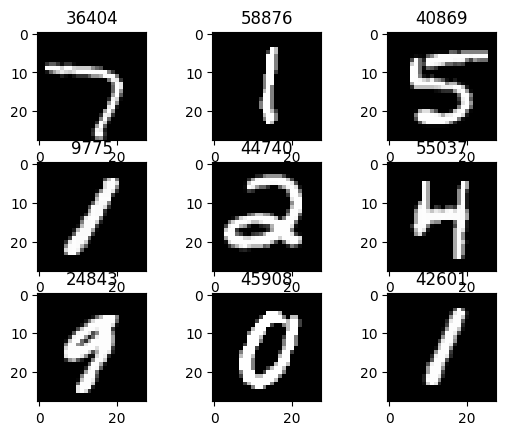

In [ ]:
# Let's check some random images, just to see if all is alright

for i in range (0, 9, 1):
  plt.subplot(330 + i + 1)

  img_index = rd.randint(0, 60000)
  plt.title(str(img_index))
  plt.imshow(trainX[img_index], cmap=plt.get_cmap('gray'))

plt.show()

The next function does a similar function. It turns the grayscale representation of the pixels, which should be a value between 0 and 255 (2^8). To do that, each normalized set is first converted from unsigned integers to floats and the corresponding float value is determined by the ratio of the image value divided by the maximum one.

In [ ]:
# Scale the pixels
def prep_pixels(train, test):
  # Convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  # Normalize the values to a range of 0-1
  train_norm = train_norm/255.0
  test_norm = test_norm/255.0

  # Return the normalized images
  return train_norm, test_norm

# Get the normalized data
trainX_norm, testX_norm = prep_pixels(trainX, testX)

Train X=[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0

# Building the MNIST learning model

The learning model for this case is a bunch of Artificial Neuron layers, namely, 5 of them. Layer #0 is the input layer and layer #4 is the output one. The ones in the middle filter the images progressively until the last layer sendd them into one of the 10 output "boxes"

1. The input layer is a Conv2D type layer. This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.

2. Layer #1 is a MaxPooling2D one. This one downsamples the input along its spacial dimensions (height and width) by taking the maximum value over an input window (of size defined by `pool_size` for each channel of the input.

3. Layer #2 is a simple Flattening layer. This one flattens the input, i.e., transports the input from a tensor (multidimensional array) to a flat value. This does not affect the batch size.

4. Layer #3 is a regular, densely-connected Neural Network layer. Dense layers implement the operation `output = activation(dot(input, kernel) + bias)` where `activation` is the elementwise activation function passed as the `activation` argument, `kernel` is a weights matrix created by the layer, and `bias` is a bias vector created by the layer.

5. The last layer, Layer #4, is the output layer and, as expected, has 10 NN in it. Each represents a digit and each image "goes out" from the learning circuit by one and only one of these nodes, it representing the digit that was determined by the learning model.

6. Before compiling the model, an optimizer is also added to the model. In this particular case, we are using a SGD optimizer. This is a gradient descent (with momentum) optimizer

In [ ]:
# Define CNN model
def define_model():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_uniform"))

  model.add(keras.layers.Input(trainX.shape[1:]))

  model.add(keras.layers.MaxPooling2D((2, 2)))

  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_uniform"))

  model.add(keras.layers.Dense(10, activation="softmax"))

  # Compile the model
  opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

# learning_model = define_model()


Learning model: 

AttributeError: 'NoneType' object has no attribute 'get_metrics_result'

In [ ]:
# Evaluate a model using  k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()

  # Prepare cross validation
  kfold = ms.KFold(n_folds, shuffle=True, random_state=1)

  # Enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # Define model
    model = define_model()

    # Select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

    # Fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

    # Evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

    # Store scores
    scores.append(acc)
    histories.append(history)

  return scores, histories

# scores, histories = evaluate_model(trainX_norm, trainY, n_folds=5)

# print("Scores: ", end="")
# print(scores)

# print("Histories: ", end="")
# print(histories)

AttributeError: 'NoneType' object has no attribute 'fit'